In [1]:
# This file provide a basic exploration of ames house price dataset
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import sklearn as sk

Using TensorFlow backend.
/Users/guohongting/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('/Users/guohongting/Desktop/data/final_data.csv')
df.head()

,date,TWD_USD,EUR_USD(WMR&DS),JPY_USD(WMR),GBP_USD(WMR),Crude_Oil_Dubai_FOB_Asia_US_BBL,Crude_Oil_Brent_FOB_US_BBL,tw_oil,RMB_USD,SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE,us_goldprice,US FED FUNDS EFF RATE (D) - MIDDLE RATE
0,1994/8/31,32.2175,0.81141,100.17500,0.65083,15.10,15.59,15.247,8.5574,801.1,385.8,4.70
1,1994/9/1,32.1500,0.81104,99.66498,0.64922,15.18,15.59,15.303,8.5547,800.5,386.0,4.76
2,1994/9/2,32.1850,0.80434,99.39499,0.64737,15.20,15.93,15.419,8.5547,800.5,386.7,4.72
3,1994/9/5,32.1750,0.80107,99.25000,0.64600,15.20,15.93,15.419,8.5494,800.8,386.9,4.72
4,1994/9/6,32.1125,0.79659,98.69498,0.64533,15.13,15.93,15.370,8.5474,801.2,387.6,4.81


In [4]:
df.describe()

,TWD_USD,EUR_USD(WMR&DS),JPY_USD(WMR),GBP_USD(WMR),Crude_Oil_Dubai_FOB_Asia_US_BBL,Crude_Oil_Brent_FOB_US_BBL,tw_oil,RMB_USD,SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE,us_goldprice,US FED FUNDS EFF RATE (D) - MIDDLE RATE
count,4946.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000,6106.000000
mean,31.931233,0.842721,107.738222,0.625996,51.191160,53.526734,51.891832,7.489214,1098.730503,765.744055,2.587037
std,1.649512,0.121781,14.128876,0.066067,33.151077,33.976300,33.376632,0.868718,163.410286,472.649178,2.340579
min,28.510000,0.625840,75.759990,0.474340,9.400000,9.440000,9.559000,6.039000,756.000000,252.800000,0.040000
25%,30.409750,0.754947,99.746250,0.597190,22.570000,24.010000,23.047750,6.634000,1011.575000,343.900000,0.170000
50%,32.078250,0.810160,109.287500,0.625870,44.355000,47.100000,45.287500,8.014200,1122.550000,586.500000,1.740000
75%,33.071000,0.911265,118.362500,0.656250,74.340000,76.520000,74.692750,8.277575,1186.075000,1223.800000,5.220000
max,35.180000,1.206710,147.140000,0.828880,140.110000,141.070000,139.278000,8.557400,1964.800000,1895.000000,7.800000


In [5]:
df.columns.format

<bound method Index.format of Index(['date', 'TWD_USD', 'EUR_USD(WMR&DS)', 'JPY_USD(WMR)', 'GBP_USD(WMR)',
       'Crude_Oil_Dubai_FOB_Asia_US_BBL', 'Crude_Oil_Brent_FOB_US_BBL',
       'tw_oil', 'RMB_USD', 'SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE',
       'us_goldprice', 'US FED FUNDS EFF RATE (D) - MIDDLE RATE'],
      dtype='object')>

## 將變數遺失值刪除

In [6]:
df.dropna(inplace=True) 

In [7]:
df=df.drop('Crude_Oil_Dubai_FOB_Asia_US_BBL',axis=1)
df=df.drop('Crude_Oil_Brent_FOB_US_BBL',axis=1)

## 檢視變數的分部

[3.3, 3.6, 0, 500]

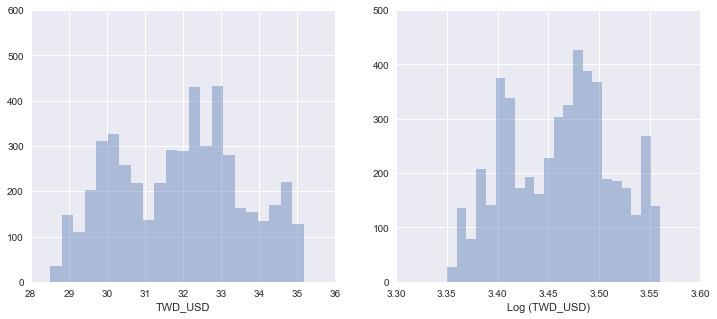

In [108]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['TWD_USD'],kde=False)
plt.xlabel('TWD_USD')
plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['TWD_USD']),kde=False)
plt.xlabel('Log (TWD_USD)')##取log好像沒啥用
plt.axis([3.3,3.6,0,500])

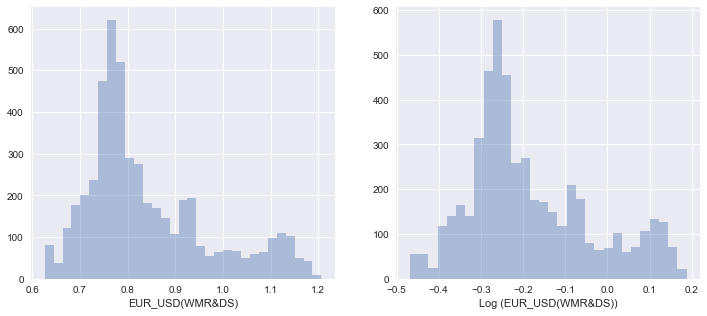

In [109]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['EUR_USD(WMR&DS)'],kde=False)
plt.xlabel('EUR_USD(WMR&DS)')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['EUR_USD(WMR&DS)']),kde=False)
plt.xlabel('Log (EUR_USD(WMR&DS))')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

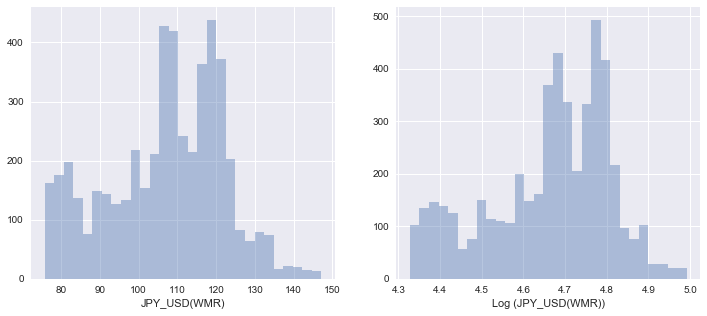

In [110]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['JPY_USD(WMR)'],kde=False)
plt.xlabel('JPY_USD(WMR)')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['JPY_USD(WMR)']),kde=False)
plt.xlabel('Log (JPY_USD(WMR))')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

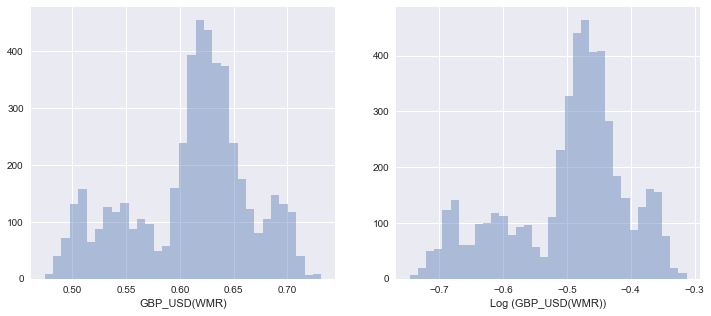

In [111]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['GBP_USD(WMR)'],kde=False)
plt.xlabel('GBP_USD(WMR)')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['GBP_USD(WMR)']),kde=False)
plt.xlabel('Log (GBP_USD(WMR))')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

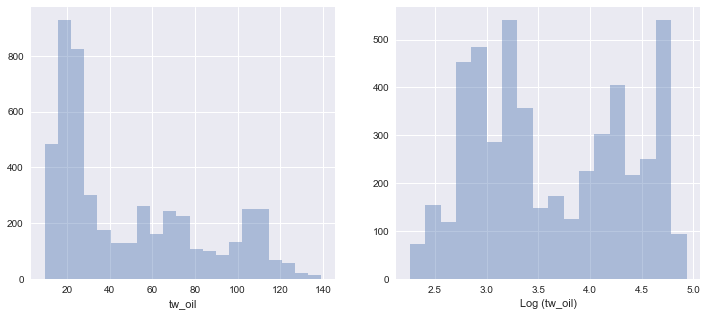

In [112]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['tw_oil'],kde=False)
plt.xlabel('tw_oil')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['tw_oil']),kde=False)
plt.xlabel('Log (tw_oil)')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

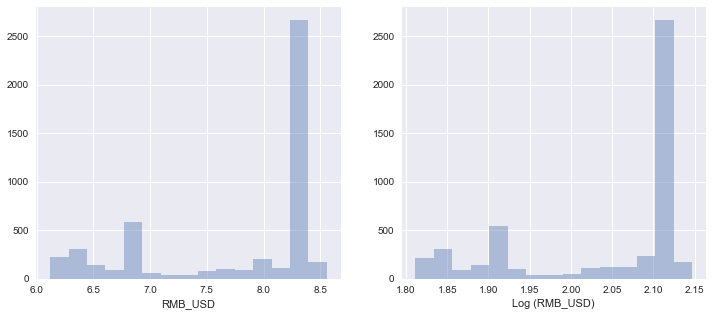

In [113]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['RMB_USD'],kde=False)
plt.xlabel('RMB_USD')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['RMB_USD']),kde=False)
plt.xlabel('Log (RMB_USD)')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

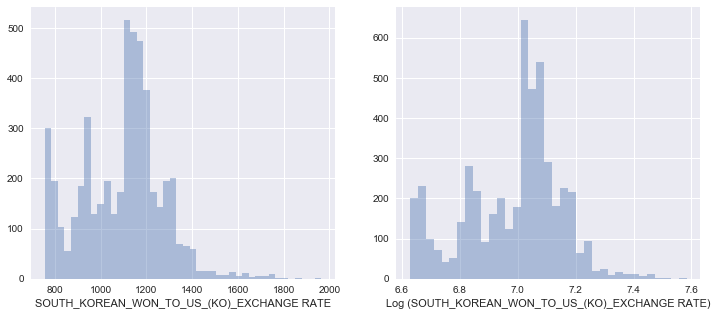

In [114]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE'],kde=False)
plt.xlabel('SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE']),kde=False)
plt.xlabel('Log (SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE)')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

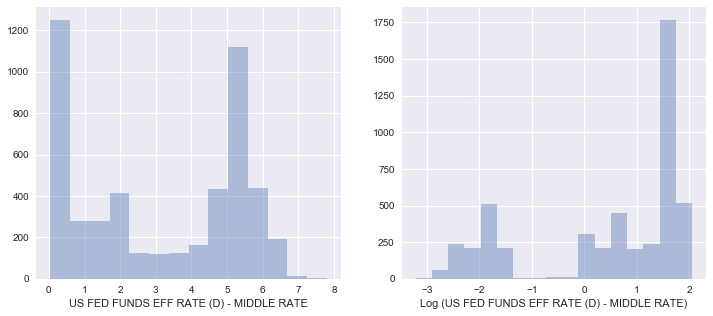

In [115]:
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['US FED FUNDS EFF RATE (D) - MIDDLE RATE'],kde=False)
plt.xlabel('US FED FUNDS EFF RATE (D) - MIDDLE RATE')
#plt.axis([28,36,0,600])
plt.subplot(122)
sns.distplot(np.log(df['US FED FUNDS EFF RATE (D) - MIDDLE RATE']),kde=False)
plt.xlabel('Log (US FED FUNDS EFF RATE (D) - MIDDLE RATE)')##取log好像沒啥用
#plt.axis([3.3,3.6,0,500])

## 看原始資料之間的彼此相關性

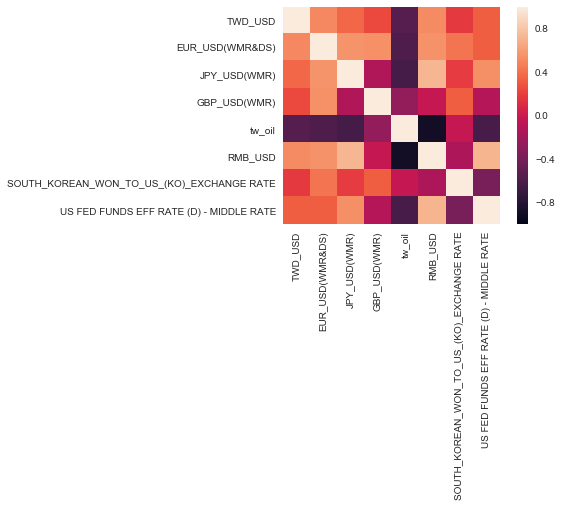

In [101]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1,vmin=-1, square=True)


In [99]:
corr_list = corr['TWD_USD'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

RMB_USD                                      0.516366
EUR_USD(WMR&DS)                              0.507641
JPY_USD(WMR)                                 0.363328
US FED FUNDS EFF RATE (D) - MIDDLE RATE      0.323879
GBP_USD(WMR)                                 0.240770
SOUTH_KOREAN_WON_TO_US_(KO)_EXCHANGE RATE    0.179041
tw_oil                                      -0.553813
Name: TWD_USD, dtype: float64

In [163]:
df.to_csv('/Users/guohongting/Desktop/data/out1.csv')

## random walk

In [8]:
df_TWD_USD = df.TWD_USD.values.astype('float32')
df_TWD_USD = df_TWD_USD.reshape(-1, 1)

In [9]:
# 標準化
scaler = MinMaxScaler(feature_range=(0, 1))
df_TWD_USD = scaler.fit_transform(df_TWD_USD)
##資料切分成訓練與測試
train_size = int(len(df_TWD_USD) * 0.80)
test_size = len(df_TWD_USD) - train_size
train, test = df_TWD_USD[0:train_size,:], df_TWD_USD[train_size:len(df_TWD_USD),:]
print(len(train), len(test))


3956 990


In [10]:
history = [X for X in train]
predictions = list()


In [11]:
from math import sqrt

## random walk_1=            0.01197

In [14]:
sqrt(9)

3.0

RMSE: 0.00014


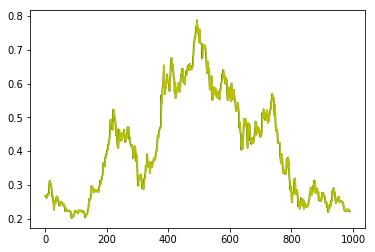

In [12]:

for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])###random_walk用t-1期來代表t期
	# observation
	history.append(test[i])
# report performance
rmse = mean_squared_error(test, predictions)
print('RMSE: %.5f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test,color='g')
pyplot.plot(predictions,color='y')
pyplot.show()

RMSE: 0.01197


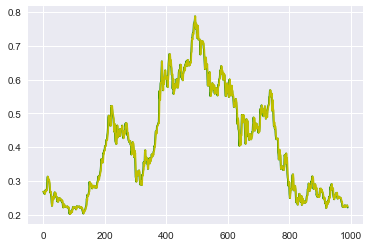

In [156]:

for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])###random_walk用t-1期來代表t期
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.5f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test,color='g')
pyplot.plot(predictions,color='y')
pyplot.show()

## random walk_2=            0.03286

RMSE: 0.03286


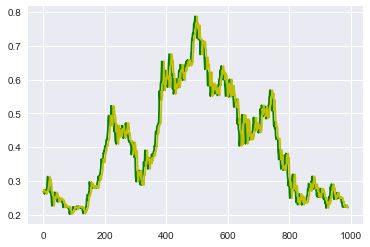

In [157]:

history = [X for X in train]
predictions = list()

for i in range(len(test)):
	# make prediction
	predictions.append(history[-7])###random_walk用t-1期來代表t期
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.5f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test,color='g')
pyplot.plot(predictions,color='y')
pyplot.show()

## random walk_14=     0.4771       

RMSE: 0.04771


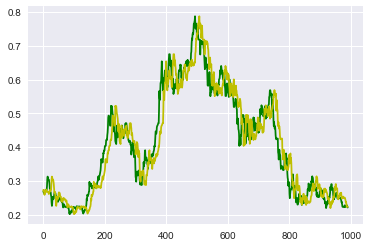

In [158]:

history = [X for X in train]
predictions = list()

for i in range(len(test)):
	# make prediction
	predictions.append(history[-14])###random_walk用t-1期來代表t期
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.5f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test,color='g')
pyplot.plot(predictions,color='y')
pyplot.show()

## random walk_30=            0.07336

RMSE: 0.07336


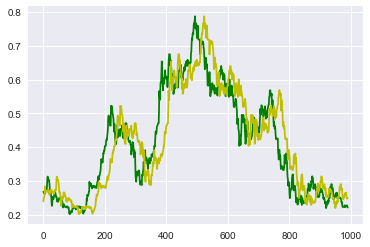

In [160]:

history = [X for X in train]
predictions = list()

for i in range(len(test)):
	# make prediction
	predictions.append(history[-30])###random_walk用t-1期來代表t期
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.5f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test,color='g')
pyplot.plot(predictions,color='y')
pyplot.show()